In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline

In [3]:
df = pd.read_csv('Population_Colorado.csv')

with open('colorado_counties.geojson') as f:
    counties = json.load(f)

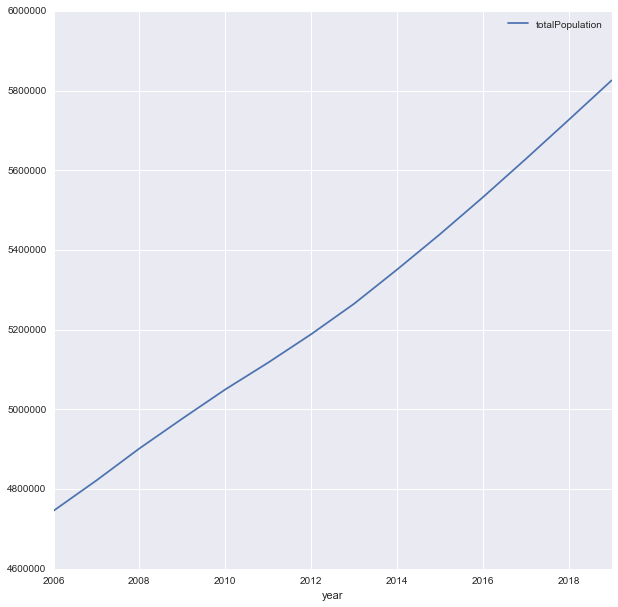

In [12]:
full_df = df.groupby(['year'], as_index=False).sum()
full_df.drop(['fipsCode', 'age', 'malePopulation', 'femalePopulation'],
             inplace = True, axis=1)
pot_df = full_df[(full_df['year'] > 2005) & (full_df['year'] < 2020)] 
                 
pot_df.plot(x = 'year', y='totalPopulation', figsize = (10,10))
plt.savefig('pop_2006_2020')

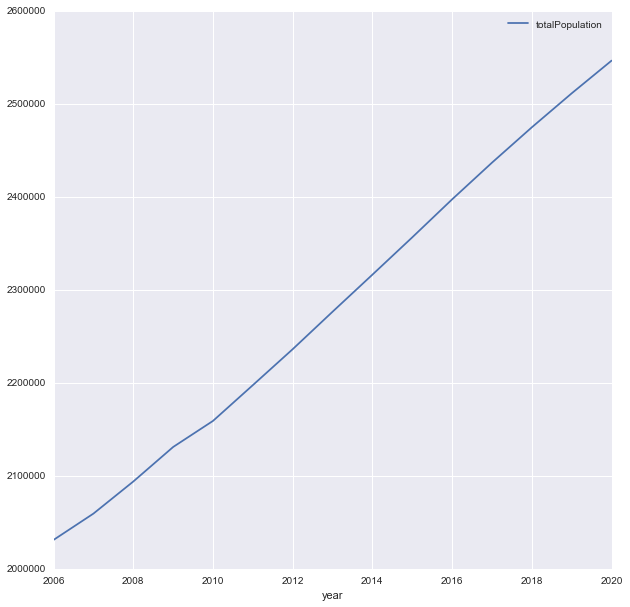

In [29]:
pot_county_df = df.groupby(['county', 'year'], as_index=False).sum()
pot_county_df.drop(['fipsCode', 'age', 'malePopulation', 'femalePopulation'],
             inplace = True, axis=1)

counties = ['Denver', 'Adams', 'Arapahoe', 'Jefferson']

denver_area = pot_county_df[pot_county_df['county'].isin(counties)]
da_years = denver_area.groupby('year', as_index=False).sum()
da_years[da_years['year'].isin(range(2006,2021))].plot(x = 'year', y = 'totalPopulation', figsize=(10,10))
plt.savefig('denver_area_pop_change.png')

In [58]:
df_2015 = full_df[full_df['year'] == 2015]
df_2015.head()

,county,year,totalPopulation
25,Adams,2015,487571
76,Alamosa,2015,16202
127,Arapahoe,2015,627056
178,Archuleta,2015,12526
229,Baca,2015,3708


In [59]:
d = {}
for x in range(len(counties['features'])):
    name = counties['features'][x]['properties']['name'][:-11]
    if name in df['county'].unique():
        d[name] = counties['features'][x]
    else:
        print 'not in: ', name

ser = pd.Series(d.values(), index = d.keys())
ser.name = 'coordinates'

df_2015 = df_2015.join(ser, on='county')

In [60]:
df_2015.head()

,county,year,totalPopulation,coordinates
25,Adams,2015,487571,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
76,Alamosa,2015,16202,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
127,Arapahoe,2015,627056,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
178,Archuleta,2015,12526,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
229,Baca,2015,3708,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."


In [61]:
# colors from
# https://gka.github.io/palettes/#colors=lightyellow,orange,deeppink,darkred|steps=7|bez=1|coL=1

colors = ['#ffffe0','#fffddb','#fffad7','#fff7d1','#fff5cd','#fff2c8',
          '#fff0c4','#ffedbf','#ffebba','#ffe9b7','#ffe5b2','#ffe3af',
          '#ffe0ab','#ffdda7','#ffdba4','#ffd9a0','#ffd69c','#ffd399',
          '#ffd196','#ffcd93','#ffca90','#ffc88d','#ffc58a','#ffc288',
          '#ffbf86','#ffbd83','#ffb981','#ffb67f','#ffb47d','#ffb17b',
          '#ffad79','#ffaa77','#ffa775','#ffa474','#ffa172','#ff9e70',
          '#ff9b6f','#ff986e','#ff956c','#fe916b','#fe8f6a','#fd8b69',
          '#fc8868','#fb8567','#fa8266','#f98065','#f87d64','#f77a63',
          '#f67862','#f57562','#f37261','#f37060','#f16c5f','#f0695e',
          '#ee665d','#ed645c','#ec615b','#ea5e5b','#e85b59','#e75859',
          '#e55658','#e45356','#e35056','#e14d54','#df4a53','#dd4852',
          '#db4551','#d9434f','#d8404e','#d53d4d','#d43b4b','#d2384a',
          '#cf3548','#cd3346','#cc3045','#ca2e43','#c72b42','#c52940',
          '#c2263d','#c0233c','#be213a','#bb1e37','#ba1c35','#b71933',
          '#b41731','#b2152e','#b0122c','#ac1029','#aa0e27','#a70b24',
          '#a40921','#a2071f','#a0051c','#9d0419','#990215','#970212',
          '#94010e','#91000a','#8e0006','#8b0000', '#8b0000']

scl = dict(zip(range(0, 101), colors))

In [62]:
def get_scl(obj):
    frac = obj / 10000
    return scl[frac]
    
df_2015['color'] = df_2015['totalPopulation'].apply(get_scl)

In [63]:
df_2015.head(3)

,county,year,totalPopulation,coordinates,color
25,Adams,2015,487571,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#f67862
76,Alamosa,2015,16202,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#fffddb
127,Arapahoe,2015,627056,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#e35056


In [64]:
layers_ls = []
for x in df_2015.index:
    item_dict = dict(sourcetype = 'geojson',
                     source = df_2015.ix[x]['coordinates'],
                     type = 'fill',
                     color = df_2015.ix[x]['color'])
    layers_ls.append(item_dict)

In [88]:
layers_ls

[{'color': '#f67862',
  'source': {u'geometry': {u'coordinates': [[[[-104.582488, 39.739636],
       [-104.884646, 39.740156],
       [-104.884664, 39.747467],
       [-104.880138, 39.747428],
       [-104.880228, 39.754809],
       [-104.846932, 39.754889],
       [-104.856431, 39.758387],
       [-104.856377, 39.768673],
       [-104.832961, 39.766194999999996],
       [-104.833009, 39.769177],
       [-104.828323, 39.769155999999995],
       [-104.828229, 39.773174],
       [-104.781727, 39.773387],
       [-104.78182699999999, 39.776486],
       [-104.772149, 39.776683999999996],
       [-104.772166, 39.771466],
       [-104.763225, 39.771488],
       [-104.763126, 39.769489],
       [-104.734601, 39.769180999999996],
       [-104.734399, 39.798442],
       [-104.762606, 39.798432999999996],
       [-104.76247, 39.82298],
       [-104.666277, 39.822849999999995],
       [-104.666196, 39.814005],
       [-104.655455, 39.814048],
       [-104.655511, 39.822469999999996],
       [-104

In [65]:
colorscl = [[i * .01, v] for i,v in enumerate(scl.values())]

In [66]:
mapbox_access_token = os.environ['MAPBOX_AT']

In [95]:
data = go.Data([
            go.Scattermapbox(
                    lat = [0],
                    lon = [0],
                    marker = go.Marker(
                                  cmax=100,
                                  cmin=0,
                                  colorscale = colorscl,
                                  showscale = True,
                                  autocolorscale=False,
                                  color=range(0,101),
                                  colorbar= go.ColorBar(
                                                 len = .89
                                                        )
                                       ),
                    mode = 'markers')
                     ])


layout = go.Layout(
    title = 'Colorado 2016 Population (x 10,000)',
    height=1050,
    width=800,
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        layers= layers_ls,
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=39.03,
            lon=-105.7
        ),
        pitch=0,
        zoom=5.5,
        style='light'
    ),
)

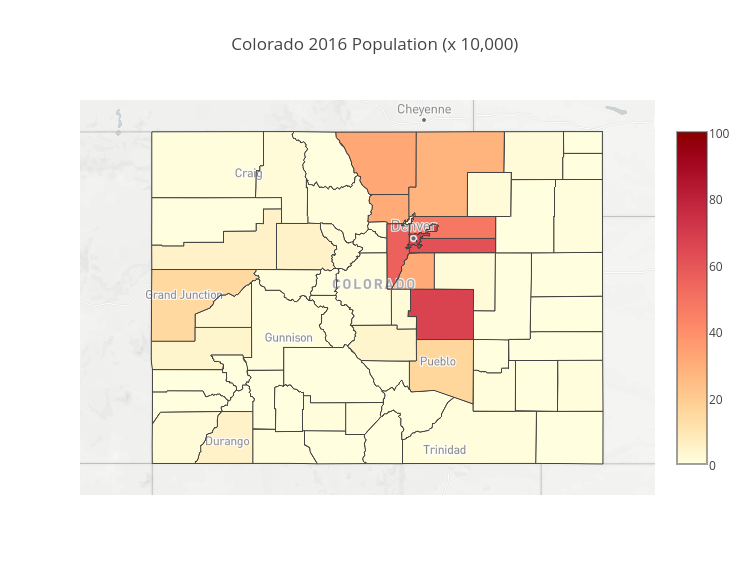

In [96]:
fig = dict(data = data, layout=layout)
fn = 'test.jpeg'
save_fn = 'images/{}'.format(fn)
h = 575
w = 750
py.image.save_as(fig, filename=save_fn, width = w, height= h)
py.image.ishow(fig, width = w, height= h)

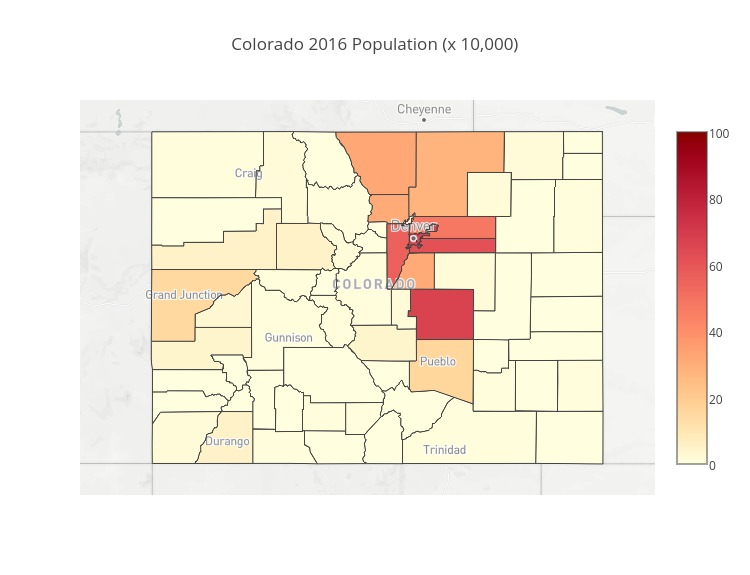

In [97]:
from IPython.display import Image

Image('images/test.jpeg')